# IBM data science capstone project Mark Forster

This project will analyse football stadium data in the UK and investigate the surrounding facilities relative to the size of each stadium. The goal is to identify suitable locations to open sports bars/pubs within close proximity to suitably sized football stadiums.

### Obtaining data and location for football stadiums in the UK

In [84]:
# import dependencies
import pandas as pd
from bs4 import BeautifulSoup
import requests

In [86]:
# import stadium data as pandas dataframe
stadium_data = pd.read_csv("stadiums.csv")
stadium_data.head()

,Name,Team,Capacity,Latitude,Longitude,Easting,Northing,Grid Reference,Also known as
0,Abbey Stadium,Cambridge United,10847,52.212799,0.154298,547284,259362,TL472593,NaN
1,Adams Park,Wycombe Wanderers,10284,51.630600,-0.800299,483134,193102,SU831931,NaN
2,Alexandra Stadium,Crewe Alexandra,10153,53.087502,-2.435690,370916,354565,SJ709545,Gresty Road
3,Almondvale Stadium,Livingston,10122,55.886398,-3.522070,304893,666964,NT048669,NaN
4,Amex Stadium,Brighton and Hove Albion,22374,50.860901,-0.080140,535213,108577,TQ352085,Falmer Stadium


In [77]:
# clean up the data table
stadium_data = stadium_data[["Name", "Team", "Capacity", "Latitude", "Longitude"]]
stadium_data = stadium_data.rename(columns={"Name": "Stadium_name", "Team": "Team_name"})
stadium_data.head(10)

,Stadium_name,Team_name,Capacity,Latitude,Longitude
0,Abbey Stadium,Cambridge United,10847,52.212799,0.154298
1,Adams Park,Wycombe Wanderers,10284,51.630600,-0.800299
2,Alexandra Stadium,Crewe Alexandra,10153,53.087502,-2.435690
3,Almondvale Stadium,Livingston,10122,55.886398,-3.522070
4,Amex Stadium,Brighton and Hove Albion,22374,50.860901,-0.080140
5,Anfield,Liverpool,45522,53.430801,-2.960960
6,Ashton Gate,Bristol City,21497,51.439999,-2.620210
7,B2net Stadium,Chesterfield,10400,53.253502,-1.427200
8,Balmoor,Peterhead,4000,57.511200,-1.795990
9,Bayview Stadium,East Fife,2000,56.188900,-2.999140


In [78]:
stadium_data.shape

(141, 5)

### Explring the stadium data using seaborn

In [79]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

Histogram showing stadium capacities

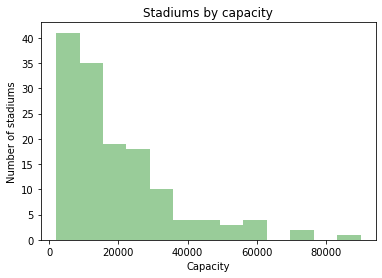

In [80]:
# histogram of stadiums by capacity
sns.distplot(stadium_data["Capacity"], kde=False, color="green")
plt.title("Stadiums by capacity")
plt.ylabel("Number of stadiums")
plt.show()

Histogram with KDE showing stadium capacities

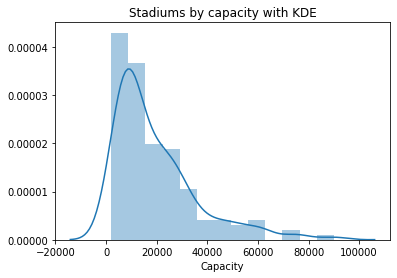

In [81]:
# histogram/KDE of stadiums by capacity
sns.distplot(stadium_data["Capacity"])
plt.title("Stadiums by capacity with KDE")
plt.show()

Graph showing the split of stadiums between the north and the south of the UK

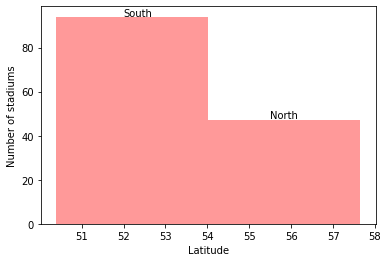

In [82]:
# histogram of stadiums by north-south
sns.distplot(stadium_data["Latitude"], kde=False, bins=2, color="red")
plt.ylabel("Number of stadiums")

# Annotate Text
plt.annotate('North', # text to display
             xy=(55.5, 47),                    # start the text at at point (year 2008 , pop 30)
             va='bottom',                    # want the text to be vertically 'bottom' aligned
             ha='left',                      # want the text to be horizontally 'left' algned.
            )
plt.annotate('South', # text to display
             xy=(52, 93.5),                    # start the text at at point (year 2008 , pop 30)
             va='bottom',                    # want the text to be vertically 'bottom' aligned
             ha='left',                      # want the text to be horizontally 'left' algned.
            )
plt.show()

### Exploring the stadium location data and clusters on a map

In [8]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files
!pip install geopy
#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
!pip install folium
import folium # map rendering library

print('Libraries imported.')

  Using cached geographiclib-1.50-py3-none-any.whl (38 kB)
  Using cached folium-0.11.0-py2.py3-none-any.whl (93 kB)
  Using cached branca-0.4.1-py3-none-any.whl (24 kB)
Libraries imported.


Obtain coordinates for UK using geolocator

In [11]:
# obtain coordiates for the UK using geolocator
address = 'UK'

geolocator = Nominatim(user_agent="application")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of the UK are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of the UK are 54.7023545, -3.2765753.


Pin stadium locations onto map of the UK

In [12]:
# create map of the UK using latitude and longitude values from previous table
stadium_map = folium.Map(location=[latitude, longitude], zoom_start=6)

# add markers to map
for lat, lng, stadium_name, team_name in zip(stadium_data['Latitude'], stadium_data['Longitude'], stadium_data['Stadium_name'], stadium_data['Team_name']):
    label = '{}, {}'.format(stadium_name, team_name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=4,
        popup=label,
        color='green',
        fill=True,
        fill_color='green',
        fill_opacity=0.7,
        parse_html=False).add_to(stadium_map)  
    
stadium_map

### Explore venues near stadiums

Define Foursquare credentials

In [13]:
# define Foursquare credentials
CLIENT_ID = 'NKSSR5QXLKL0WSRPF1IE32LMKVCW23K5DTMTVOZZJUIL00XY' # your Foursquare ID
CLIENT_SECRET = 'NBN2J220A1UQ23XPNLF3ML2SUTHHRY3HQXGBOSWPGPGIPUDL' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: NKSSR5QXLKL0WSRPF1IE32LMKVCW23K5DTMTVOZZJUIL00XY
CLIENT_SECRET:NBN2J220A1UQ23XPNLF3ML2SUTHHRY3HQXGBOSWPGPGIPUDL


Explore venues near first stadium

In [14]:
# get first stadium latitude and longitude values
stadium_latitude = stadium_data.loc[0, 'Latitude'] # stadium latitude value
stadium_longitude = stadium_data.loc[0, 'Longitude'] # stadium longitude value

stadium_name = stadium_data.loc[0, 'Stadium_name'] # stadium name

print('Latitude and longitude values of {} are {}, {}.'.format(stadium_name, 
                                                               stadium_latitude, 
                                                               stadium_longitude))

Latitude and longitude values of Abbey Stadium are 52.212799, 0.154298.


Generate url to get max of 50 venues within 500 meters

In [15]:
LIMIT = 50 # limit of number of venues returned by Foursquare API

radius = 500 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    stadium_latitude, 
    stadium_longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=NKSSR5QXLKL0WSRPF1IE32LMKVCW23K5DTMTVOZZJUIL00XY&client_secret=NBN2J220A1UQ23XPNLF3ML2SUTHHRY3HQXGBOSWPGPGIPUDL&v=20180605&ll=52.212799,0.154298&radius=500&limit=50'

Send request

In [16]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ef9ca02564b600a126a910a'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Abbey',
  'headerFullLocation': 'Abbey, Cambridge',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 11,
  'suggestedBounds': {'ne': {'lat': 52.2172990045, 'lng': 0.16162846952620166},
   'sw': {'lat': 52.208298995499995, 'lng': 0.14696753047379832}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b2943b3f964a520f59b24e3',
       'name': 'Pipasha',
       'location': {'address': '529c Newmarket Road',
        'lat': 52.21338800141078,
        'lng': 0.1546647454251226,
        'labeledLatLngs': [{'label': 'display',
          'lat': 52.21338800141078,
 

Use the get catagory

In [17]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Clean the file and make a dataframe

In [18]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(20)

C:\Users\Mark\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Pipasha,Indian Restaurant,52.213388,0.154665
1,Abbey Stadium,Soccer Stadium,52.212570,0.154379
2,Abbey Leisure Complex,Gym Pool,52.209225,0.154829
3,B&Q,Hardware Store,52.211464,0.149038
4,Cambridge United FC,Sports Club,52.211833,0.154815
5,Enterprise Rent-A-Car,Rental Car Location,52.213482,0.151470
6,DFS Cambridge,Furniture / Home Store,52.212543,0.148246
7,Be Military Fit,Gym / Fitness Center,52.209058,0.155784
8,The Hub Studios,Music Venue,52.214796,0.148285
9,PC World,Electronics Store,52.210868,0.148144


Get all stadiums

In [19]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Stadium_name', 
                  'Stadium Latitude', 
                  'Stadium Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Create dataframe for all stadiums

In [20]:
all_stadium_venues = getNearbyVenues(names=stadium_data['Stadium_name'],
                                   latitudes=stadium_data['Latitude'],
                                   longitudes=stadium_data['Longitude']
                                  )

Abbey Stadium
Adams Park
Alexandra Stadium
Almondvale Stadium
Amex Stadium
Anfield
Ashton Gate
B2net Stadium
Balmoor
Bayview Stadium
Bescot Stadium
Bloomfield Road
Bootham Crescent
Borough Briggs
Boundary Park
Bramall Lane
Brisbane Road
Britannia Stadium
Broadfield Stadium
Broadwood Stadium
Brunton Park
Cappielow Park
Cardiff City Stadium
Carrow Road
Celtic Park
Central Park
Cliftonhill
Craven Cottage
Crown Ground
Deepdale
Dens Park
Dumbarton Football Stadium
DW Stadium
East End Park
Easter Road
Edgar Street
Elland Road
Emirates Stadium
Etihad Stadium
Ewood Park
Falkirk Stadium
Field Mill
Fir Park
Firhill
Forthbank Stadium
Fratton Park
Galabank
Gayfield Park
Gigg Lane
Glanford Park
Glebe Park
Globe Arena
Goodison Park
Griffin Park
Hampden Park
Highbury Stadium
Hillsborough
Home Park
Huish Park
Ibrox
Kassam Stadium 
KC Stadium
Keepmoat Stadium
Kenilworth Road
King Power Stadium
Kingsmeadow
Liberty Stadium
Links Park
Loftus Road
London Road
Madjeski Stadium
McDiarmid Park
Meadow Lane
Mem

In [44]:
print(all_stadium_venues.shape)
all_stadium_venues.head()

(1675, 7)


,Stadium_name,Stadium Latitude,Stadium Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Abbey Stadium,52.212799,0.154298,Pipasha,52.213388,0.154665,Indian Restaurant
1,Abbey Stadium,52.212799,0.154298,Abbey Stadium,52.212570,0.154379,Soccer Stadium
2,Abbey Stadium,52.212799,0.154298,Abbey Leisure Complex,52.209225,0.154829,Gym Pool
3,Abbey Stadium,52.212799,0.154298,B&Q,52.211464,0.149038,Hardware Store
4,Abbey Stadium,52.212799,0.154298,Cambridge United FC,52.211833,0.154815,Sports Club


Filter to show only pubs, bars, gastropubs

In [45]:
pubs_list = all_stadium_venues.loc[all_stadium_venues["Venue Category"].isin(["Pub", "Bar", "Gastropub"])]
pubs_list.head()

,Stadium_name,Stadium Latitude,Stadium Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
22,Alexandra Stadium,53.087502,-2.43569,The Brockle Bank,53.087550,-2.429237,Gastropub
24,Alexandra Stadium,53.087502,-2.43569,Brocklebank (Brewers Fayre),53.087405,-2.429179,Pub
27,Alexandra Stadium,53.087502,-2.43569,The Brunswick,53.088780,-2.439393,Pub
44,Almondvale Stadium,55.886398,-3.52207,The Lime Kiln,55.883775,-3.521065,Gastropub
63,Amex Stadium,50.860901,-0.08014,The Swan,50.863851,-0.078795,Gastropub


Count of pubs/bars/gastropubs per stadium

In [46]:
pubs_list_grouped = pubs_list.groupby('Stadium_name').count()
pubs_list_grouped.head()

,Stadium Latitude,Stadium Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Stadium_name,,,,,,
Alexandra Stadium,3,3,3,3,3,3
Almondvale Stadium,1,1,1,1,1,1
Amex Stadium,2,2,2,2,2,2
Anfield,5,5,5,5,5,5
B2net Stadium,2,2,2,2,2,2


In [47]:
stadium_data_with_pubs = stadium_data.copy()
stadium_data_with_pubs.set_index("Stadium_name", inplace=True)
stadium_data_with_pubs.head()

,Team_name,Capacity,Latitude,Longitude
Stadium_name,,,,
Abbey Stadium,Cambridge United,10847,52.212799,0.154298
Adams Park,Wycombe Wanderers,10284,51.630600,-0.800299
Alexandra Stadium,Crewe Alexandra,10153,53.087502,-2.435690
Almondvale Stadium,Livingston,10122,55.886398,-3.522070
Amex Stadium,Brighton and Hove Albion,22374,50.860901,-0.080140


In [48]:
stadium_data_with_pubs = stadium_data_with_pubs.join(pubs_list_grouped, on=None, how='left', lsuffix='', rsuffix='', sort=False)
stadium_data_with_pubs.head()

,Team_name,Capacity,Latitude,Longitude,Stadium Latitude,Stadium Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Stadium_name,,,,,,,,,,
Abbey Stadium,Cambridge United,10847,52.212799,0.154298,NaN,NaN,NaN,NaN,NaN,NaN
Adams Park,Wycombe Wanderers,10284,51.630600,-0.800299,NaN,NaN,NaN,NaN,NaN,NaN
Alexandra Stadium,Crewe Alexandra,10153,53.087502,-2.435690,3.0,3.0,3.0,3.0,3.0,3.0
Almondvale Stadium,Livingston,10122,55.886398,-3.522070,1.0,1.0,1.0,1.0,1.0,1.0
Amex Stadium,Brighton and Hove Albion,22374,50.860901,-0.080140,2.0,2.0,2.0,2.0,2.0,2.0


Merge and clean dataframes to have capacity and number of pubs in columns

In [50]:
stadium_data_with_pubs = stadium_data_with_pubs[["Team_name", "Capacity", "Latitude","Longitude", "Venue"]]
stadium_data_with_pubs.fillna(value=0, inplace=True)
stadium_data_with_pubs.Venue = stadium_data_with_pubs.Venue.astype(int) 
stadium_data_with_pubs.rename(columns={"Venue": "Number of pubs nearby"}, inplace=True)
stadium_data_with_pubs.head()

C:\Users\Mark\anaconda3\lib\site-packages\pandas\core\frame.py:4153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
C:\Users\Mark\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\Mark\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

,Team_name,Capacity,Latitude,Longitude,Number of pubs nearby
Stadium_name,,,,,
Abbey Stadium,Cambridge United,10847,52.212799,0.154298,0
Adams Park,Wycombe Wanderers,10284,51.630600,-0.800299,0
Alexandra Stadium,Crewe Alexandra,10153,53.087502,-2.435690,3
Almondvale Stadium,Livingston,10122,55.886398,-3.522070,1
Amex Stadium,Brighton and Hove Albion,22374,50.860901,-0.080140,2


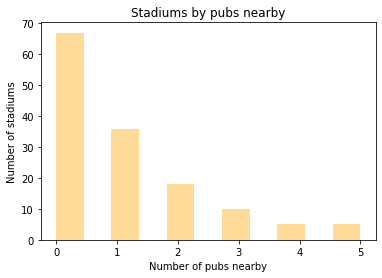

In [29]:
# histogram/KDE of stadiums by capacity
sns.distplot(stadium_data_with_pubs["Number of pubs nearby"], kde=False, color="orange", bins=11)
plt.title("Stadiums by pubs nearby")
plt.ylabel("Number of stadiums")
plt.show()

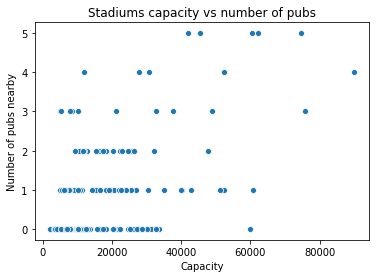

In [30]:
# histogram/KDE of stadiums by capacity
sns.scatterplot(stadium_data_with_pubs["Capacity"], stadium_data_with_pubs["Number of pubs nearby"])
plt.title("Stadiums capacity vs number of pubs")
plt.show()

List of the most viable stadiums to open a new pub nearby

In [51]:
stadium_data_with_pubs = stadium_data_with_pubs.sort_values(['Number of pubs nearby', 'Capacity'], ascending=[True, False])
stadium_data_with_pubs = stadium_data_with_pubs.head(20)
stadium_data_with_pubs = stadium_data_with_pubs.reset_index()
stadium_data_with_pubs

,Stadium_name,Team_name,Capacity,Latitude,Longitude,Number of pubs nearby
0,Olympic Stadium,West Ham,60000,51.538300,-0.016587,0
1,Pride Park,Derby County,33597,52.914902,-1.447270,0
2,St Mary's Stadium,Southampton,32689,50.905800,-1.391140,0
3,Ricoh Arena,Coventry City,32609,52.448101,-1.495630,0
4,Ewood Park,Blackburn Rovers,31154,53.728600,-2.489370,0
5,St Andrews,Birmingham City,30009,52.475601,-1.868240,0
6,University of Bolton Stadium,Bolton Wanderers,28723,53.580502,-2.535710,0
7,Britannia Stadium,Stoke City,27902,52.988400,-2.175420,0
8,The Valley,Charlton Athletic,27111,51.486500,0.036757,0
9,The Hawthorns,West Bromwich Albion,26272,52.508999,-1.964180,0


Map plot of the most viable stadiums to open a new pub nearby

In [52]:
# create map of the UK using latitude and longitude values from previous table
stadium_map_pubs = folium.Map(location=[latitude, longitude], zoom_start=6)

# add markers to map
for lat, lng, stadium_name, team_name, capacity in zip(stadium_data_with_pubs['Latitude'], stadium_data_with_pubs['Longitude'], stadium_data_with_pubs['Stadium_name'], stadium_data_with_pubs['Team_name'], stadium_data_with_pubs['Capacity']):
    label = '{}, {}, {}'.format(stadium_name, team_name, capacity)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=4,
        popup=label,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.7,
        parse_html=False).add_to(stadium_map_pubs)  
    
stadium_map_pubs

### K-means clustering of stadiums with pubs nearby

Now investigate each stadium based on all venues nearby

In [150]:
stadium_data.head()

,Name,Team,Capacity,Latitude,Longitude,Easting,Northing,Grid Reference,Also known as
0,Abbey Stadium,Cambridge United,10847,52.212799,0.154298,547284,259362,TL472593,NaN
1,Adams Park,Wycombe Wanderers,10284,51.630600,-0.800299,483134,193102,SU831931,NaN
2,Alexandra Stadium,Crewe Alexandra,10153,53.087502,-2.435690,370916,354565,SJ709545,Gresty Road
3,Almondvale Stadium,Livingston,10122,55.886398,-3.522070,304893,666964,NT048669,NaN
4,Amex Stadium,Brighton and Hove Albion,22374,50.860901,-0.080140,535213,108577,TQ352085,Falmer Stadium


In [151]:
stadium_data = stadium_data[["Name", "Team", "Capacity", "Latitude", "Longitude"]]
stadium_data = stadium_data.rename(columns={"Name": "Stadium_name", "Team": "Team_name"})
stadium_data.head(10)

,Stadium_name,Team_name,Capacity,Latitude,Longitude
0,Abbey Stadium,Cambridge United,10847,52.212799,0.154298
1,Adams Park,Wycombe Wanderers,10284,51.630600,-0.800299
2,Alexandra Stadium,Crewe Alexandra,10153,53.087502,-2.435690
3,Almondvale Stadium,Livingston,10122,55.886398,-3.522070
4,Amex Stadium,Brighton and Hove Albion,22374,50.860901,-0.080140
5,Anfield,Liverpool,45522,53.430801,-2.960960
6,Ashton Gate,Bristol City,21497,51.439999,-2.620210
7,B2net Stadium,Chesterfield,10400,53.253502,-1.427200
8,Balmoor,Peterhead,4000,57.511200,-1.795990
9,Bayview Stadium,East Fife,2000,56.188900,-2.999140


In [154]:
all_stadium_venues.head()

,Stadium_name,Stadium Latitude,Stadium Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Abbey Stadium,52.212799,0.154298,Pipasha,52.213388,0.154665,Indian Restaurant
1,Abbey Stadium,52.212799,0.154298,Abbey Stadium,52.212570,0.154379,Soccer Stadium
2,Abbey Stadium,52.212799,0.154298,Abbey Leisure Complex,52.209225,0.154829,Gym Pool
3,Abbey Stadium,52.212799,0.154298,B&Q,52.211464,0.149038,Hardware Store
4,Abbey Stadium,52.212799,0.154298,Cambridge United FC,52.211833,0.154815,Sports Club


In [155]:
all_stadium_venues.groupby('Stadium_name').count()

,Stadium Latitude,Stadium Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Stadium_name,,,,,,
Abbey Stadium,11,11,11,11,11,11
Adams Park,2,2,2,2,2,2
Alexandra Stadium,17,17,17,17,17,17
Almondvale Stadium,31,31,31,31,31,31
Amex Stadium,4,4,4,4,4,4
Anfield,21,21,21,21,21,21
Ashton Gate,10,10,10,10,10,10
B2net Stadium,21,21,21,21,21,21
Balmoor,2,2,2,2,2,2


Number of unique venues

In [156]:
print('There are {} unique categories.'.format(len(all_stadium_venues['Venue Category'].unique())))

There are 223 unique categories.


Analyse each stadium

In [157]:
# one hot encoding
stadium_onehot = pd.get_dummies(all_stadium_venues[['Venue Category']], prefix="", prefix_sep="")

# add stadium column back to dataframe
stadium_onehot['Stadium_name'] = all_stadium_venues['Stadium_name'] 

# move stadium column to the first column
fixed_columns = [stadium_onehot.columns[-1]] + list(stadium_onehot.columns[:-1])
stadium_onehot = stadium_onehot[fixed_columns]

stadium_onehot.head()

,Stadium_name,African Restaurant,American Restaurant,Antique Shop,Arcade,Art Gallery,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Australian Restaurant,Auto Dealership,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Bakery,Bank,Bar,Basketball Court,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Betting Shop,Bistro,Boat or Ferry,Bookstore,Bowling Alley,Bowling Green,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Burger Joint,Bus Station,Bus Stop,Cafeteria,Café,Camera Store,Campground,Canal,Canal Lock,Caribbean Restaurant,Carpet Store,Casino,Castle,Cheese Shop,Chinese Restaurant,Chocolate Shop,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Football Field,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cricket Ground,Currency Exchange,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Donut Shop,Dry Cleaner,Electronics Store,English Restaurant,Entertainment Service,Ethiopian Restaurant,Event Space,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Flea Market,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gas Station,Gastropub,Gay Bar,General Entertainment,Gift Shop,Golf Driving Range,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Halal Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Historic Site,History Museum,Hobby Shop,Hockey Field,Hookah Bar,Hostel,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Intersection,Italian Restaurant,Japanese Restaurant,Juice Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lighting Store,Liquor Store,Locksmith,Lounge,Malay Restaurant,Market,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Motorcycle Shop,Movie Theater,Multiplex,Museum,Music Venue,Nature Preserve,New American Restaurant,Nightclub,Noodle House,Optical Shop,Other Repair Shop,Outdoor Sculpture,Outdoor Supply Store,Outlet Mall,Outlet Store,Park,Pastry Shop,Performing Arts Venue,Pet Store,Pharmacy,Pie Shop,Pizza Place,Platform,Playground,Plaza,Pool,Pool Hall,Portuguese Restaurant,Pub,Racetrack,Record Shop,Recreation Center,Rental Car Location,Restaurant,River,Rock Climbing Spot,Rock Club,Roof Deck,Rugby Pitch,Rugby Stadium,Salon / Barbershop,Sandwich Place,Satay Restaurant,Scenic Lookout,Seafood Restaurant,Shaanxi Restaurant,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Soccer Field,Soccer Stadium,Social Club,Souvenir Shop,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Stationery Store,Steakhouse,Supermarket,Sushi Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Track,Track Stadium,Trail,Train Station,Tram Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Waterfront,Wine Shop,Women's Store
0,Abbey Stadium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Abbey Stadium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,

In [131]:
stadium_onehot.shape

(1675, 224)

In [158]:
all_stads_grouped = stadium_onehot.groupby('Stadium_name').mean().reset_index()
all_stads_grouped.head(10)

,Stadium_name,African Restaurant,American Restaurant,Antique Shop,Arcade,Art Gallery,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,Athletics & Sports,Australian Restaurant,Auto Dealership,Auto Garage,Auto Workshop,Automotive Shop,BBQ Joint,Bakery,Bank,Bar,Basketball Court,Beach,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Betting Shop,Bistro,Boat or Ferry,Bookstore,Bowling Alley,Bowling Green,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Buffet,Burger Joint,Bus Station,Bus Stop,Cafeteria,Café,Camera Store,Campground,Canal,Canal Lock,Caribbean Restaurant,Carpet Store,Casino,Castle,Cheese Shop,Chinese Restaurant,Chocolate Shop,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Football Field,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cricket Ground,Currency Exchange,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Donut Shop,Dry Cleaner,Electronics Store,English Restaurant,Entertainment Service,Ethiopian Restaurant,Event Space,Farm,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Flea Market,Food,Food & Drink Shop,Food Court,Food Truck,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gas Station,Gastropub,Gay Bar,General Entertainment,Gift Shop,Golf Driving Range,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Halal Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Historic Site,History Museum,Hobby Shop,Hockey Field,Hookah Bar,Hostel,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Chinese Restaurant,Indian Restaurant,Indie Movie Theater,Intersection,Italian Restaurant,Japanese Restaurant,Juice Bar,Kids Store,Kitchen Supply Store,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lighting Store,Liquor Store,Locksmith,Lounge,Malay Restaurant,Market,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Motorcycle Shop,Movie Theater,Multiplex,Museum,Music Venue,Nature Preserve,New American Restaurant,Nightclub,Noodle House,Optical Shop,Other Repair Shop,Outdoor Sculpture,Outdoor Supply Store,Outlet Mall,Outlet Store,Park,Pastry Shop,Performing Arts Venue,Pet Store,Pharmacy,Pie Shop,Pizza Place,Platform,Playground,Plaza,Pool,Pool Hall,Portuguese Restaurant,Pub,Racetrack,Record Shop,Recreation Center,Rental Car Location,Restaurant,River,Rock Climbing Spot,Rock Club,Roof Deck,Rugby Pitch,Rugby Stadium,Salon / Barbershop,Sandwich Place,Satay Restaurant,Scenic Lookout,Seafood Restaurant,Shaanxi Restaurant,Shoe Store,Shop & Service,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Soccer Field,Soccer Stadium,Social Club,Souvenir Shop,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Stationery Store,Steakhouse,Supermarket,Sushi Restaurant,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Thrift / Vintage Store,Toy / Game Store,Track,Track Stadium,Trail,Train Station,Tram Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Waterfront,Wine Shop,Women's Store
0,Abbey Stadium,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.181818,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.090909,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.090909,0.090909,0.0,0.0,0.090909,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.090909,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.090909,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.

In [159]:
all_stads_grouped.shape

(141, 224)

Each stadium with top 5 most common venues

In [160]:
num_top_venues = 5

for hood in all_stads_grouped['Stadium_name']:
    print("----"+hood+"----")
    temp = all_stads_grouped[all_stads_grouped['Stadium_name'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Abbey Stadium----
                  venue  freq
0     Electronics Store  0.18
1     Indian Restaurant  0.09
2           Music Venue  0.09
3           Sports Club  0.09
4  Gym / Fitness Center  0.09


----Adams Park----
                        venue  freq
0  Construction & Landscaping   0.5
1              Soccer Stadium   0.5
2                         Pub   0.0
3                 Music Venue   0.0
4             Nature Preserve   0.0


----Alexandra Stadium----
             venue  freq
0         Platform  0.12
1      Coffee Shop  0.12
2              Pub  0.12
3  Thai Restaurant  0.06
4             Café  0.06


----Almondvale Stadium----
              venue  freq
0    Clothing Store  0.16
1       Coffee Shop  0.10
2       Pizza Place  0.06
3  Department Store  0.03
4              Park  0.03


----Amex Stadium----
                venue  freq
0           Gastropub  0.25
1         Coffee Shop  0.25
2      Soccer Stadium  0.25
3                 Bar  0.25
4  African Restaurant  0.00


----A

Function to sort venues in descending order

In [161]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Dataframe to display top 10 venues from each neighborhood

In [162]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Stadium_name']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
all_stads_sorted = pd.DataFrame(columns=columns)
all_stads_sorted['Stadium_name'] = all_stads_grouped['Stadium_name']

for ind in np.arange(all_stads_grouped.shape[0]):
    all_stads_sorted.iloc[ind, 1:] = return_most_common_venues(all_stads_grouped.iloc[ind, :], num_top_venues)

all_stads_sorted.head()

,Stadium_name,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Abbey Stadium,Electronics Store,Soccer Stadium,Rental Car Location,Gym / Fitness Center,Gym Pool,Furniture / Home Store,Sports Club,Hardware Store,Indian Restaurant,Music Venue
1,Adams Park,Construction & Landscaping,Soccer Stadium,Women's Store,English Restaurant,Food & Drink Shop,Food,Flea Market,Fish & Chips Shop,Fast Food Restaurant,Farmers Market
2,Alexandra Stadium,Platform,Coffee Shop,Pub,Thai Restaurant,Pizza Place,Clothing Store,Rock Club,Café,Bookstore,Gastropub
3,Almondvale Stadium,Clothing Store,Coffee Shop,Pizza Place,Movie Theater,Bookstore,Soccer Stadium,Mexican Restaurant,Fast Food Restaurant,Shoe Store,Buffet
4,Amex Stadium,Coffee Shop,Bar,Gastropub,Soccer Stadium,Convenience Store,Ethiopian Restaurant,Food & Drink Shop,Food,Flea Market,Concert Hall


Run k-means to split stadiums into 5 clusters

In [163]:
# set number of clusters
kclusters = 5

all_stads_grouped_clustering = all_stads_grouped.drop('Stadium_name', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(all_stads_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 1, 0, 0, 2, 3, 0, 0, 1, 2])

Add clustering labels

In [164]:
# add clustering labels
all_stads_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

all_stads_merged = stadium_data

# merge all_stadiums_grouped with all_stadiums_data to add latitude/longitude for each stadium name
all_stads_merged = all_stads_merged.join(all_stads_sorted.set_index('Stadium_name'), on='Stadium_name')

all_stads_merged.head() # check the last columns!

,Stadium_name,Team_name,Capacity,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Abbey Stadium,Cambridge United,10847,52.212799,0.154298,0,Electronics Store,Soccer Stadium,Rental Car Location,Gym / Fitness Center,Gym Pool,Furniture / Home Store,Sports Club,Hardware Store,Indian Restaurant,Music Venue
1,Adams Park,Wycombe Wanderers,10284,51.630600,-0.800299,1,Construction & Landscaping,Soccer Stadium,Women's Store,English Restaurant,Food & Drink Shop,Food,Flea Market,Fish & Chips Shop,Fast Food Restaurant,Farmers Market
2,Alexandra Stadium,Crewe Alexandra,10153,53.087502,-2.435690,0,Platform,Coffee Shop,Pub,Thai Restaurant,Pizza Place,Clothing Store,Rock Club,Café,Bookstore,Gastropub
3,Almondvale Stadium,Livingston,10122,55.886398,-3.522070,0,Clothing Store,Coffee Shop,Pizza Place,Movie Theater,Bookstore,Soccer Stadium,Mexican Restaurant,Fast Food Restaurant,Shoe Store,Buffet
4,Amex Stadium,Brighton and Hove Albion,22374,50.860901,-0.080140,2,Coffee Shop,Bar,Gastropub,Soccer Stadium,Convenience Store,Ethiopian Restaurant,Food & Drink Shop,Food,Flea Market,Concert Hall


Visualise resulting clusters

In [165]:
# create map
map_stad_clusters = folium.Map(location=[latitude, longitude], zoom_start=6)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(all_stads_merged['Latitude'], all_stads_merged['Longitude'], all_stads_merged['Stadium_name'], all_stads_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_stad_clusters)
       
map_stad_clusters